In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import LeaveOneOut

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# Se importan los datos

In [2]:
df = pd.read_excel("..//Base_datos_Clasificacion binaria.xlsx", index_col = 0)

In [3]:
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,MP,Empresa sancionada,UTE
0,0,1738093.21,1484428.72,6,1,0
1,0,469670.24,272492.00,4,0,0
2,0,1025088.19,707310.85,1,0,0
3,0,999890.00,497621.36,6,0,0
4,0,72598.27,47508.92,1,1,0
...,...,...,...,...,...,...
2211,1,5542028.88,5514320.00,6,1,0
2212,1,6095782.00,5100555.00,6,1,0
2213,1,3752906.00,3744400.00,6,1,0
2214,1,23896564.00,19547338.00,6,0,1


In [4]:
n_clase0 = len(df[df["Licitacion reparto"] == 0])
n_clase0

1851

In [5]:
n_clase1 = len(df[df["Licitacion reparto"] == 1])
n_clase1

365

# Se trata el desbalanceo de clases mediante una tecnica de Sobre - Muestreo. Hay que instalar la libreria imbalanced - learn

In [6]:
y = df["Licitacion reparto"]
X = df[df.columns[1:]]

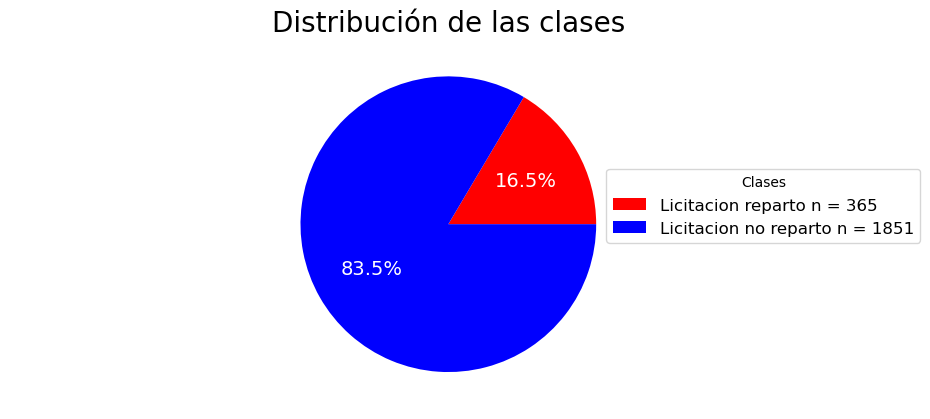

In [7]:
datos = [len(y[y == 1]), len(y[y == 0])]
etiquetas = [f'Licitacion reparto n = {n_clase1}', f'Licitacion no reparto n = {n_clase0}']
colores = ['red', 'blue']

plt.pie(datos, labels = etiquetas, colors = colores, autopct = '%1.1f%%', textprops = {'fontsize': 14, 'color': 'white'})
plt.title('Distribución de las clases', fontsize = 20)
plt.legend(title = "Clases", bbox_to_anchor=(1.8, 0.55), loc='right', fontsize = 12)
plt.show()

### Se utiliza la técnica "RandomOverSampler" que es la generación de nuevos datos de la clase minoritaria mediante muestreo simple con reemplazamiento y de forma aleatoria.

In [8]:
# conda install -c conda-forge imbalanced-learn
ros = RandomOverSampler(random_state = 123)
X_res, y_res = ros.fit_resample(X, y)
df = pd.concat([y_res, X_res], axis = 1)
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,MP,Empresa sancionada,UTE
0,0,1738093.21,1484428.72,6,1,0
1,0,469670.24,272492.00,4,0,0
2,0,1025088.19,707310.85,1,0,0
3,0,999890.00,497621.36,6,0,0
4,0,72598.27,47508.92,1,1,0
...,...,...,...,...,...,...
3697,1,25652311.00,23974592.00,6,0,0
3698,1,312588.00,342566.00,1,0,0
3699,1,140176.00,139475.00,1,0,0
3700,1,1573000.00,1339724.00,1,1,0


In [9]:
n_clase0 = len(df[df["Licitacion reparto"] == 0])
n_clase0

1851

In [10]:
n_clase1 = len(df[df["Licitacion reparto"] == 1])
n_clase1

1851

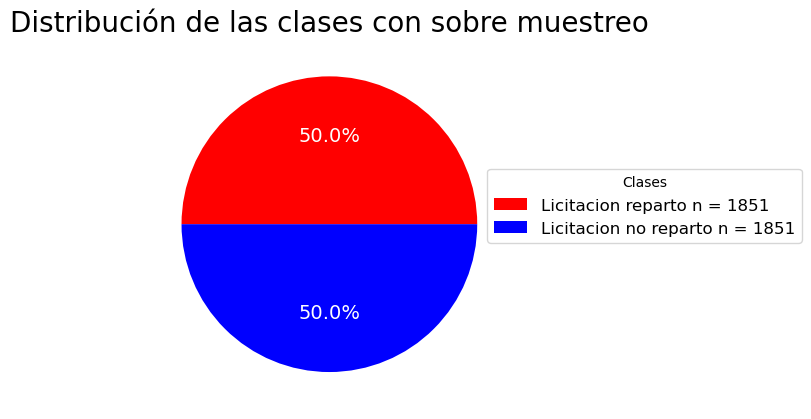

In [11]:
datos = [len(y_res[y_res == 1]), len(y_res[y_res == 0])]
etiquetas = [f'Licitacion reparto n = {n_clase1}', f'Licitacion no reparto n = {n_clase0}']
colores = ['red', 'blue']

plt.pie(datos, labels = etiquetas, colors = colores, autopct = '%1.1f%%', textprops = {'fontsize': 14, 'color': 'white'})
plt.title('Distribución de las clases con sobre muestreo', fontsize = 20)
plt.legend(title = "Clases", bbox_to_anchor=(1.8, 0.55), loc='right', fontsize = 12)
plt.show()

# Se estandarizan y normalizan los predictores numericos

In [12]:
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]

In [13]:
scaler = StandardScaler()
stand = scaler.fit_transform(predictores_numericos)

In [14]:
df[["Importe presupuestado", "Importe adjudicado"]] = stand
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]
predictores_numericos

,Importe presupuestado,Importe adjudicado
0,-0.243817,-0.245165
1,-0.268501,-0.270829
2,-0.257692,-0.261621
3,-0.258182,-0.266062
4,-0.276228,-0.275593
...,...,...
3697,0.221564,0.231083
3698,-0.271557,-0.269345
3699,-0.274913,-0.273646
3700,-0.247029,-0.248230


In [15]:
norm = (predictores_numericos - predictores_numericos.min()) / (predictores_numericos.max() - predictores_numericos.min())

In [16]:
df[["Importe presupuestado", "Importe adjudicado"]] = norm
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]
predictores_numericos

,Importe presupuestado,Importe adjudicado
0,0.002679,0.002861
1,0.000699,0.000494
2,0.001566,0.001343
3,0.001526,0.000934
4,0.000079,0.000054
...,...,...
3697,0.039999,0.046796
3698,0.000454,0.000631
3699,0.000185,0.000234
3700,0.002421,0.002579


In [17]:
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,MP,Empresa sancionada,UTE
0,0,0.002679,0.002861,6,1,0
1,0,0.000699,0.000494,4,0,0
2,0,0.001566,0.001343,1,0,0
3,0,0.001526,0.000934,6,0,0
4,0,0.000079,0.000054,1,1,0
...,...,...,...,...,...,...
3697,1,0.039999,0.046796,6,0,0
3698,1,0.000454,0.000631,1,0,0
3699,1,0.000185,0.000234,1,0,0
3700,1,0.002421,0.002579,1,1,0
